In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Functions

In [63]:
def convert_to_percentage(value):
    return value / 255

In [92]:
def recommend_k_value(X, y):
    k_range = range(1, 31)
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [96]:
def recommend_product_index(v_target, v_products):
    calc = np.array(np.round(np.abs(v_target - v_products), 2))
    nearest_value = np.min(calc)
    index = np.where(calc == nearest_value)[0][0]
    return index

## Data Exploration Analysis

### Foundation Data

In [15]:
df_foundation = pd.read_csv('datasets/foundation/allShades_new.csv')
df_foundation.head()

,brand,product,url,description,imgSrc,imgAlt,name,specific,colorspace,hex,Hue,Saturation,Value
0,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,355N (medium skin with a neutral golden undert...,https://images.ulta.com/is/image/Ulta/2551437s...,355N (medium skin with a neutral golden undert...,NaN,355N,RGB,#A06F4A,18,137,0.627451
1,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,100N (very fair skin with a neutral undertone),https://images.ulta.com/is/image/Ulta/2551414s...,100N (very fair skin with a neutral undertone),NaN,100N,RGB,#F1E7DB,23,23,0.945098
2,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,110C (very fair skin with a cool undertone),https://images.ulta.com/is/image/Ulta/2551412s...,110C (very fair skin with a cool undertone),NaN,110C,RGB,#F0E7DB,24,22,0.941176
3,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,120W (very fair skin with a warm undertone),https://images.ulta.com/is/image/Ulta/2551419s...,120W (very fair skin with a warm undertone),NaN,120W,RGB,#EFD0AE,22,69,0.937255
4,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,130N (very fair skin with a neutral pink under...,https://images.ulta.com/is/image/Ulta/2551416s...,130N (very fair skin with a neutral pink under...,NaN,130N,RGB,#D5C1AA,22,51,0.835294


In [16]:
df_foundation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        6816 non-null   object 
 1   product      6816 non-null   object 
 2   url          6816 non-null   object 
 3   description  6816 non-null   object 
 4   imgSrc       6816 non-null   object 
 5   imgAlt       6816 non-null   object 
 6   name         4955 non-null   object 
 7   specific     4905 non-null   object 
 8   colorspace   6816 non-null   object 
 9   hex          6816 non-null   object 
 10  Hue          6816 non-null   int64  
 11  Saturation   6816 non-null   int64  
 12  Value        6816 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 692.4+ KB


In [17]:
df_foundation.describe()

,Hue,Saturation,Value
count,6816.000000,6816.000000,6816.000000
mean,17.120012,103.953052,0.788464
std,4.292289,35.848927,0.157067
min,0.000000,0.000000,0.184314
25%,15.000000,79.000000,0.694118
50%,17.000000,102.000000,0.831373
75%,20.000000,128.000000,0.905882
max,163.000000,230.000000,1.000000


In [18]:
total_brands = len(df_foundation['brand'].unique())
print(f"There are totals {total_brands} brands in the dataset")

There are totals 107 brands in the dataset


In [19]:
df_foundation['brand'].value_counts()

brand
bareMinerals                 370
Tarte                        242
Clinique                     232
SEPHORA COLLECTION           229
MAC                          185
                            ... 
COOLA                          3
Marc Jacobs Beauty             3
Dr. Dennis Gross Skincare      2
KIKO Milano                    2
Black Up                       1
Name: count, Length: 107, dtype: int64

In [20]:
print(df_foundation.isnull().sum())

brand             0
product           0
url               0
description       0
imgSrc            0
imgAlt            0
name           1861
specific       1911
colorspace        0
hex               0
Hue               0
Saturation        0
Value             0
dtype: int64


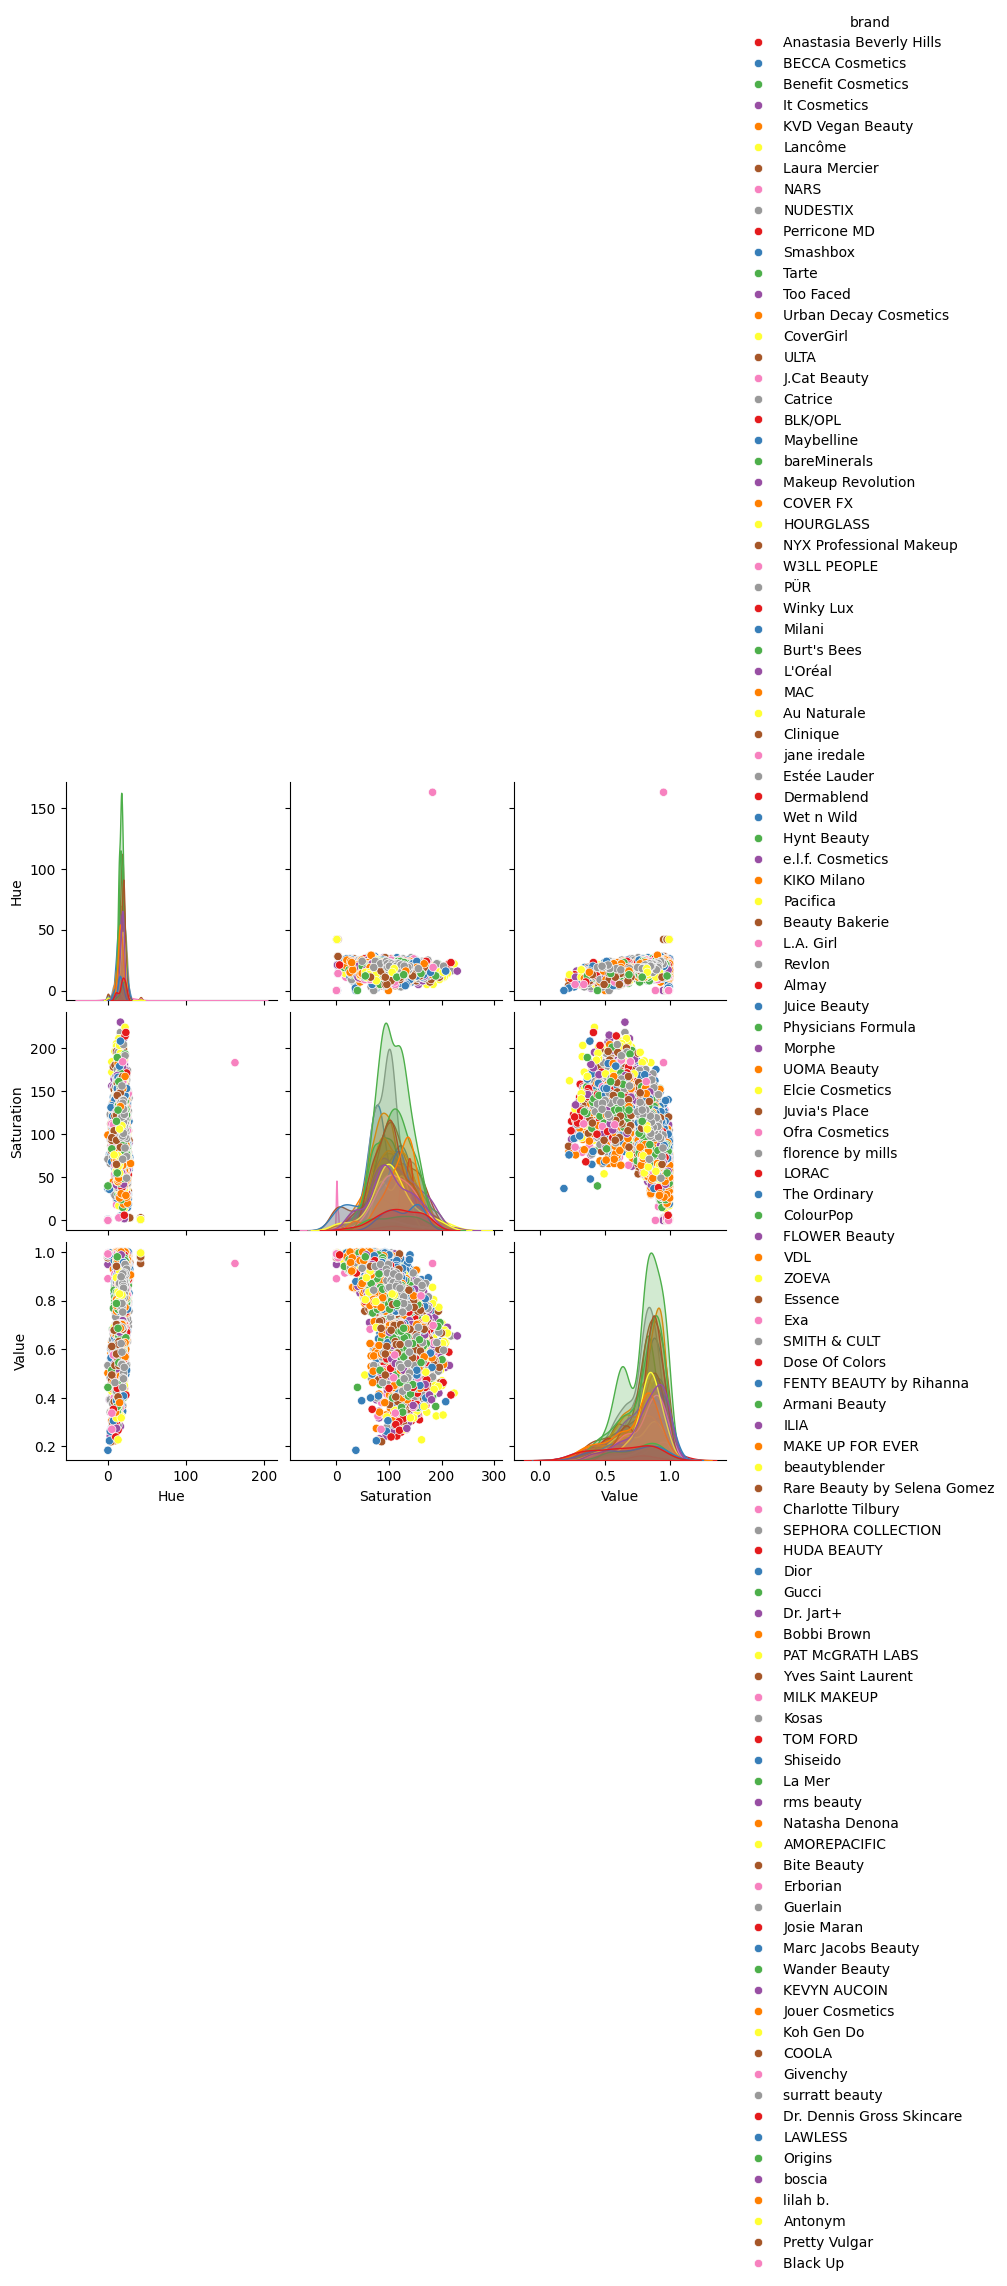

In [27]:
pair = sns.pairplot(df_foundation, hue='brand', palette='Set1')

### Maybelline Brand Data

In [52]:
df_maybelline = df_foundation[df_foundation['brand'] == 'Maybelline']
df_maybelline.head()

,brand,product,url,description,imgSrc,imgAlt,name,specific,colorspace,hex,Hue,Saturation,Value
797,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Fair Porcelain selected,https://images.ulta.com/is/image/Ulta/2537771s...,Fair Porcelain,Fair Porcelain,NaN,RGB,#F5EFE6,25,15,0.960784
798,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Porcelain,https://images.ulta.com/is/image/Ulta/2537777s...,Porcelain,Porcelain,NaN,RGB,#F7EEE3,23,20,0.968627
799,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Natural Ivory,https://images.ulta.com/is/image/Ulta/2537775s...,Natural Ivory,Natural Ivory,NaN,RGB,#F3E6D9,21,27,0.952941
800,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Classic Ivory,https://images.ulta.com/is/image/Ulta/2537780s...,Classic Ivory,Classic Ivory,NaN,RGB,#F1E6D4,26,30,0.945098
801,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Buff Beige,https://images.ulta.com/is/image/Ulta/2537779s...,Buff Beige,Buff Beige,NaN,RGB,#F4E6D9,20,28,0.956863


In [53]:
df_maybelline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 797 to 3269
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        129 non-null    object 
 1   product      129 non-null    object 
 2   url          129 non-null    object 
 3   description  129 non-null    object 
 4   imgSrc       129 non-null    object 
 5   imgAlt       129 non-null    object 
 6   name         129 non-null    object 
 7   specific     63 non-null     object 
 8   colorspace   129 non-null    object 
 9   hex          129 non-null    object 
 10  Hue          129 non-null    int64  
 11  Saturation   129 non-null    int64  
 12  Value        129 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 14.1+ KB


In [54]:
maybelline_count = df_maybelline['product'].unique().size
print(f"There are {maybelline_count} products of Maybelline foundation")

There are 6 products of Maybelline foundation


In [55]:
maybelline_unique = df_maybelline['product'].unique()
for i, product in enumerate(maybelline_unique):
    print(f"{i+1}. {product}")

1. SuperStay Full Coverage Powder Foundation
2. Fit Me Dewy + Smooth Foundation
3. Fit Me Matte + Poreless Liquid Foundation
4. Super Stay Full Coverage Foundation
5. Dream Urban Cover Flawless Coverage Foundation SPF 50
6. Dream Radiant Liquid Foundation


In [56]:
print(df_maybelline.isnull().sum())

brand           0
product         0
url             0
description     0
imgSrc          0
imgAlt          0
name            0
specific       66
colorspace      0
hex             0
Hue             0
Saturation      0
Value           0
dtype: int64


In [57]:
index = df_maybelline[df_maybelline['specific'].isnull()].index
pd.DataFrame(df_maybelline.loc[index])

,brand,product,url,description,imgSrc,imgAlt,name,specific,colorspace,hex,Hue,Saturation,Value
797,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Fair Porcelain selected,https://images.ulta.com/is/image/Ulta/2537771s...,Fair Porcelain,Fair Porcelain,NaN,RGB,#F5EFE6,25,15,0.960784
798,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Porcelain,https://images.ulta.com/is/image/Ulta/2537777s...,Porcelain,Porcelain,NaN,RGB,#F7EEE3,23,20,0.968627
799,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Natural Ivory,https://images.ulta.com/is/image/Ulta/2537775s...,Natural Ivory,Natural Ivory,NaN,RGB,#F3E6D9,21,27,0.952941
800,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Classic Ivory,https://images.ulta.com/is/image/Ulta/2537780s...,Classic Ivory,Classic Ivory,NaN,RGB,#F1E6D4,26,30,0.945098
801,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Buff Beige,https://images.ulta.com/is/image/Ulta/2537779s...,Buff Beige,Buff Beige,NaN,RGB,#F4E6D9,20,28,0.956863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,Maybelline,Dream Radiant Liquid Foundation,https://www.ulta.com/dream-radiant-liquid-foun...,Natural Beige,https://images.ulta.com/is/image/Ulta/2558053s...,Natural Beige,Natural Beige,NaN,RGB,#D9B98B,25,91,0.850980
3266,Maybelline,Dream Radiant Liquid Foundation,https://www.ulta.com/dream-radiant-liquid-foun...,Honey Beige,https://images.ulta.com/is/image/Ulta/2558034s...,Honey Beige,Honey Beige,NaN,RGB,#C39571,18,107,0.764706
3267,Maybelline,Dream Radiant Liquid Foundation,https://www.ulta.com/dream-radiant-liquid-foun...,Coconut,https://images.ulta.com/is/image/Ulta/2558026s...,Coconut,Coconut,NaN,RGB,#A97546,20,149,0.662745
3268,Maybelline,Dream Radiant Liquid Foundation,https://www.ulta.com/dream-radiant-liquid-foun...,Cocoa,https://images.ulta.com/is/image/Ulta/2558033s...,Cocoa,Cocoa,NaN,RGB,#6B4D34,19,131,0.419608


In [58]:
df_maybelline[df_maybelline['specific'].isnull()]['product'].unique()

array(['SuperStay Full Coverage Powder Foundation',
       'Fit Me Dewy + Smooth Foundation',
       'Dream Urban Cover Flawless Coverage Foundation SPF 50',
       'Dream Radiant Liquid Foundation'], dtype=object)

## Data Cleaning

From the previous data exploration, I have a clear information about the data. Turns out it has a missing value in the 'specific' column. Because 'specific' column wasn't too important, so I decided to drop it.

In [59]:
df_maybelline.drop(columns=['specific'], inplace=True)

/var/folders/sz/q7hsr2ks7kv5x7t0w0mrdr0w0000gn/T/ipykernel_73218/1814346315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maybelline.drop(columns=['specific'], inplace=True)


In [61]:
df_maybelline.columns

Index(['brand', 'product', 'url', 'description', 'imgSrc', 'imgAlt', 'name',
       'colorspace', 'hex', 'Hue', 'Saturation', 'Value'],
      dtype='object')

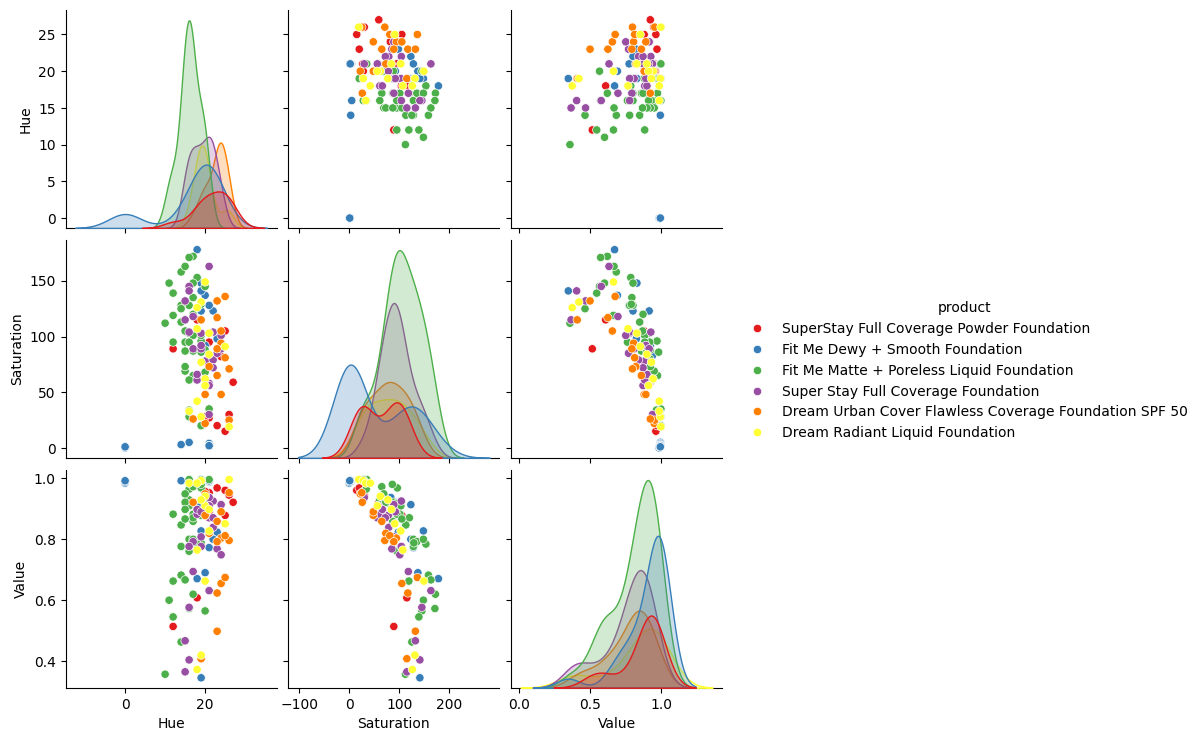

In [64]:
pair = sns.pairplot(df_maybelline, hue='product', palette='Set1')

In [62]:
df_maybelline.to_csv('datasets/foundation/maybelline_new.csv', index=False)

In [109]:
df_maybelline = pd.read_csv('datasets/foundation/maybelline_new.csv')

# GAN Images

## Image Data

This data is obtained from Kaggle. I hand labeled the images into 5 classes. The classes are: 'I & II', 'III', 'IV', 'V', and 'VI'. The classes are based on the Fitzpatrick Skin Type Classification.

See `gan.ipynb` for more details how I labeled the images.

In [65]:
df_image = pd.read_csv('datasets/gan/data/labeled_gan.csv')

In [66]:
df_image.head()

,file,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v
0,XUMjlGLbfjZ8HmkQ2EvXL2dacvLaFUVh.jpeg,I & II,111.960962,93.646384,200.589398
1,4WPKvjIxnpPNqSqVABTZubeIF9m2SwqV.jpeg,III,115.044329,82.940511,170.309099
2,7GuBG5XwibAmVoATRGTSAYrhzlOHvS3M.jpeg,III,110.441851,103.284585,176.739625
3,HqQ04u6KqZeINKzNGkzBaaCw2Z2hDCT3.jpeg,I & II,110.111626,85.754893,192.596356
4,EwKC3j8EEkQtvWwk2E6kdpAyzYbKYFyc.jpeg,I & II,110.697349,133.963478,210.744520


In [76]:
df_image['hsv_mean_v_percentage'] = df_image['hsv_mean_v'].apply(convert_to_percentage)

In [77]:
hsv_mean_v_percentage = df_image['hsv_mean_v_percentage']
hsv_mean_v_percentage

0         0.786625
1         0.667879
2         0.693097
3         0.755280
4         0.826449
            ...   
197168    0.688898
197169    0.804530
197170    0.817068
197171    0.671023
197172    0.724311
Name: hsv_mean_v_percentage, Length: 197173, dtype: float64

In [78]:
df_image

,file,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsv_mean_v_percentage
0,XUMjlGLbfjZ8HmkQ2EvXL2dacvLaFUVh.jpeg,I & II,111.960962,93.646384,200.589398,0.786625
1,4WPKvjIxnpPNqSqVABTZubeIF9m2SwqV.jpeg,III,115.044329,82.940511,170.309099,0.667879
2,7GuBG5XwibAmVoATRGTSAYrhzlOHvS3M.jpeg,III,110.441851,103.284585,176.739625,0.693097
3,HqQ04u6KqZeINKzNGkzBaaCw2Z2hDCT3.jpeg,I & II,110.111626,85.754893,192.596356,0.755280
4,EwKC3j8EEkQtvWwk2E6kdpAyzYbKYFyc.jpeg,I & II,110.697349,133.963478,210.744520,0.826449
...,...,...,...,...,...,...
197168,KGjSjWipyMr9qEP1oclGyd6a6Z0LOuky.jpeg,III,113.136744,88.230114,175.669102,0.688898
197169,So1I9znKw5yobiEryYDxVCRn7Cq3ZOQq.jpeg,III,117.902548,49.410894,205.155077,0.804530
197170,Bj7HO8bbKn49E4C72yNFPTYLbizds8Ze.jpeg,I & II,110.750781,122.262770,208.352272,0.817068
197171,4RjSL9M4ZH0sz7D8Tg358E2OSkE19TW6.jpeg,I & II,111.310893,90.158319,171.110901,0.671023


In [122]:
df_image.to_csv("datasets/gan/data/labeled_gan_new.csv", index=False)

In [100]:
recommended_product_index = np.array(df_image.apply(lambda x: recommend_product_index(x['hsv_mean_v_percentage'], df_maybelline['Value']), axis=1))

In [102]:
recommend_product_index = pd.DataFrame(recommended_product_index, columns=['recommended_product_index'])

In [107]:
recommend_product_index

,recommended_product_index
0,63
1,34
2,31
3,62
4,16
...,...
197168,31
197169,19
197170,106
197171,34


In [110]:
product = np.array([df_maybelline['product'][index] for index in recommend_product_index['recommended_product_index']])
product

array(['Fit Me Matte + Poreless Liquid Foundation',
       'Fit Me Dewy + Smooth Foundation',
       'Fit Me Dewy + Smooth Foundation', ...,
       'Dream Urban Cover Flawless Coverage Foundation SPF 50',
       'Fit Me Dewy + Smooth Foundation',
       'Super Stay Full Coverage Foundation'], dtype='<U53')

In [111]:
v_val = np.array([df_maybelline['Value'][index] for index in recommend_product_index['recommended_product_index']])
v_val

array([0.78823529, 0.67058824, 0.69019608, ..., 0.81960784, 0.67058824,
       0.74901961])

In [115]:
df_recommendation = pd.DataFrame([product, v_val]).T

In [116]:
df_recommendation.columns = ["product", "Value"]

In [117]:
df_recommendation

,product,Value
0,Fit Me Matte + Poreless Liquid Foundation,0.788235
1,Fit Me Dewy + Smooth Foundation,0.670588
2,Fit Me Dewy + Smooth Foundation,0.690196
3,Fit Me Matte + Poreless Liquid Foundation,0.760784
4,Fit Me Dewy + Smooth Foundation,0.823529
...,...,...
197168,Fit Me Dewy + Smooth Foundation,0.690196
197169,Fit Me Dewy + Smooth Foundation,0.8
197170,Dream Urban Cover Flawless Coverage Foundation...,0.819608
197171,Fit Me Dewy + Smooth Foundation,0.670588


In [121]:
merged = pd.concat([df_image, df_recommendation], axis=1)
merged.head()

,file,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsv_mean_v_percentage,recommended_product,product,Value
0,XUMjlGLbfjZ8HmkQ2EvXL2dacvLaFUVh.jpeg,I & II,111.960962,93.646384,200.589398,0.786625,63,Fit Me Matte + Poreless Liquid Foundation,0.788235
1,4WPKvjIxnpPNqSqVABTZubeIF9m2SwqV.jpeg,III,115.044329,82.940511,170.309099,0.667879,34,Fit Me Dewy + Smooth Foundation,0.670588
2,7GuBG5XwibAmVoATRGTSAYrhzlOHvS3M.jpeg,III,110.441851,103.284585,176.739625,0.693097,31,Fit Me Dewy + Smooth Foundation,0.690196
3,HqQ04u6KqZeINKzNGkzBaaCw2Z2hDCT3.jpeg,I & II,110.111626,85.754893,192.596356,0.755280,62,Fit Me Matte + Poreless Liquid Foundation,0.760784
4,EwKC3j8EEkQtvWwk2E6kdpAyzYbKYFyc.jpeg,I & II,110.697349,133.963478,210.744520,0.826449,16,Fit Me Dewy + Smooth Foundation,0.823529


In [123]:
merged.to_csv("datasets/gan/data/gan_with_foundation_recommendation.csv", index=False)

## Data Preparation

In [150]:
df_image_new = pd.read_csv('datasets/gan/data/gan_with_foundation_recommendation.csv')

In [166]:
le = LabelEncoder()
df_image_new['product'] = le.fit_transform(df_image_new['product'])
df_image_new['phototype'] = le.fit_transform(df_image_new['phototype'])

In [169]:
df_image_new

,file,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsv_mean_v_percentage,recommended_product,product,Value
0,XUMjlGLbfjZ8HmkQ2EvXL2dacvLaFUVh.jpeg,0,111.960962,93.646384,200.589398,0.786625,63,3,0.788235
1,4WPKvjIxnpPNqSqVABTZubeIF9m2SwqV.jpeg,1,115.044329,82.940511,170.309099,0.667879,34,2,0.670588
2,7GuBG5XwibAmVoATRGTSAYrhzlOHvS3M.jpeg,1,110.441851,103.284585,176.739625,0.693097,31,2,0.690196
3,HqQ04u6KqZeINKzNGkzBaaCw2Z2hDCT3.jpeg,0,110.111626,85.754893,192.596356,0.755280,62,3,0.760784
4,EwKC3j8EEkQtvWwk2E6kdpAyzYbKYFyc.jpeg,0,110.697349,133.963478,210.744520,0.826449,16,2,0.823529
...,...,...,...,...,...,...,...,...,...
197168,KGjSjWipyMr9qEP1oclGyd6a6Z0LOuky.jpeg,1,113.136744,88.230114,175.669102,0.688898,31,2,0.690196
197169,So1I9znKw5yobiEryYDxVCRn7Cq3ZOQq.jpeg,1,117.902548,49.410894,205.155077,0.804530,19,2,0.800000
197170,Bj7HO8bbKn49E4C72yNFPTYLbizds8Ze.jpeg,0,110.750781,122.262770,208.352272,0.817068,106,1,0.819608
197171,4RjSL9M4ZH0sz7D8Tg358E2OSkE19TW6.jpeg,0,111.310893,90.158319,171.110901,0.671023,34,2,0.670588


In [170]:
df_image_new.describe().T

,count,mean,std,min,25%,50%,75%,max
phototype,197173.0,0.695709,0.707276,0.000000,0.000000,1.000000,1.000000,4.000000
hsv_mean_h,197173.0,112.424546,3.320928,39.392267,110.493463,112.018024,113.833499,158.870036
hsv_mean_s,197173.0,94.857500,23.784189,16.201753,78.758540,94.040659,109.778820,224.282134
hsv_mean_v,197173.0,177.974364,26.289112,51.260052,162.045085,180.555456,196.718473,253.160737
hsv_mean_v_percentage,197173.0,0.697939,0.103095,0.201020,0.635471,0.708061,0.771445,0.992787
recommended_product,197173.0,61.605017,31.484890,0.000000,31.000000,65.000000,93.000000,128.000000
product,197173.0,3.099004,1.117987,0.000000,2.000000,3.000000,4.000000,5.000000
Value,197173.0,0.697517,0.103195,0.345098,0.631373,0.690196,0.772549,0.992157


In [171]:
df_image_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197173 entries, 0 to 197172
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   file                   197173 non-null  object 
 1   phototype              197173 non-null  int64  
 2   hsv_mean_h             197173 non-null  float64
 3   hsv_mean_s             197173 non-null  float64
 4   hsv_mean_v             197173 non-null  float64
 5   hsv_mean_v_percentage  197173 non-null  float64
 6   recommended_product    197173 non-null  int64  
 7   product                197173 non-null  int64  
 8   Value                  197173 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 13.5+ MB


In [174]:
df_image_new["phototype"].value_counts()

phototype
1    95210
0    83107
2    15687
3     2085
4     1084
Name: count, dtype: int64

In [175]:
df_image_new["product"].value_counts()

product
3    63959
4    54618
2    43475
5    20145
1    13016
0     1960
Name: count, dtype: int64

Because we have a situation called class imbalance, I decided to use two methods to solve this problem. I used SMOTE and Random Undersampling.
- **SMOTE (Synthetic Minority Oversampling Technique)** is a method that creates synthetic data for the minority class. It randomly picks a point from the minority class and computes the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

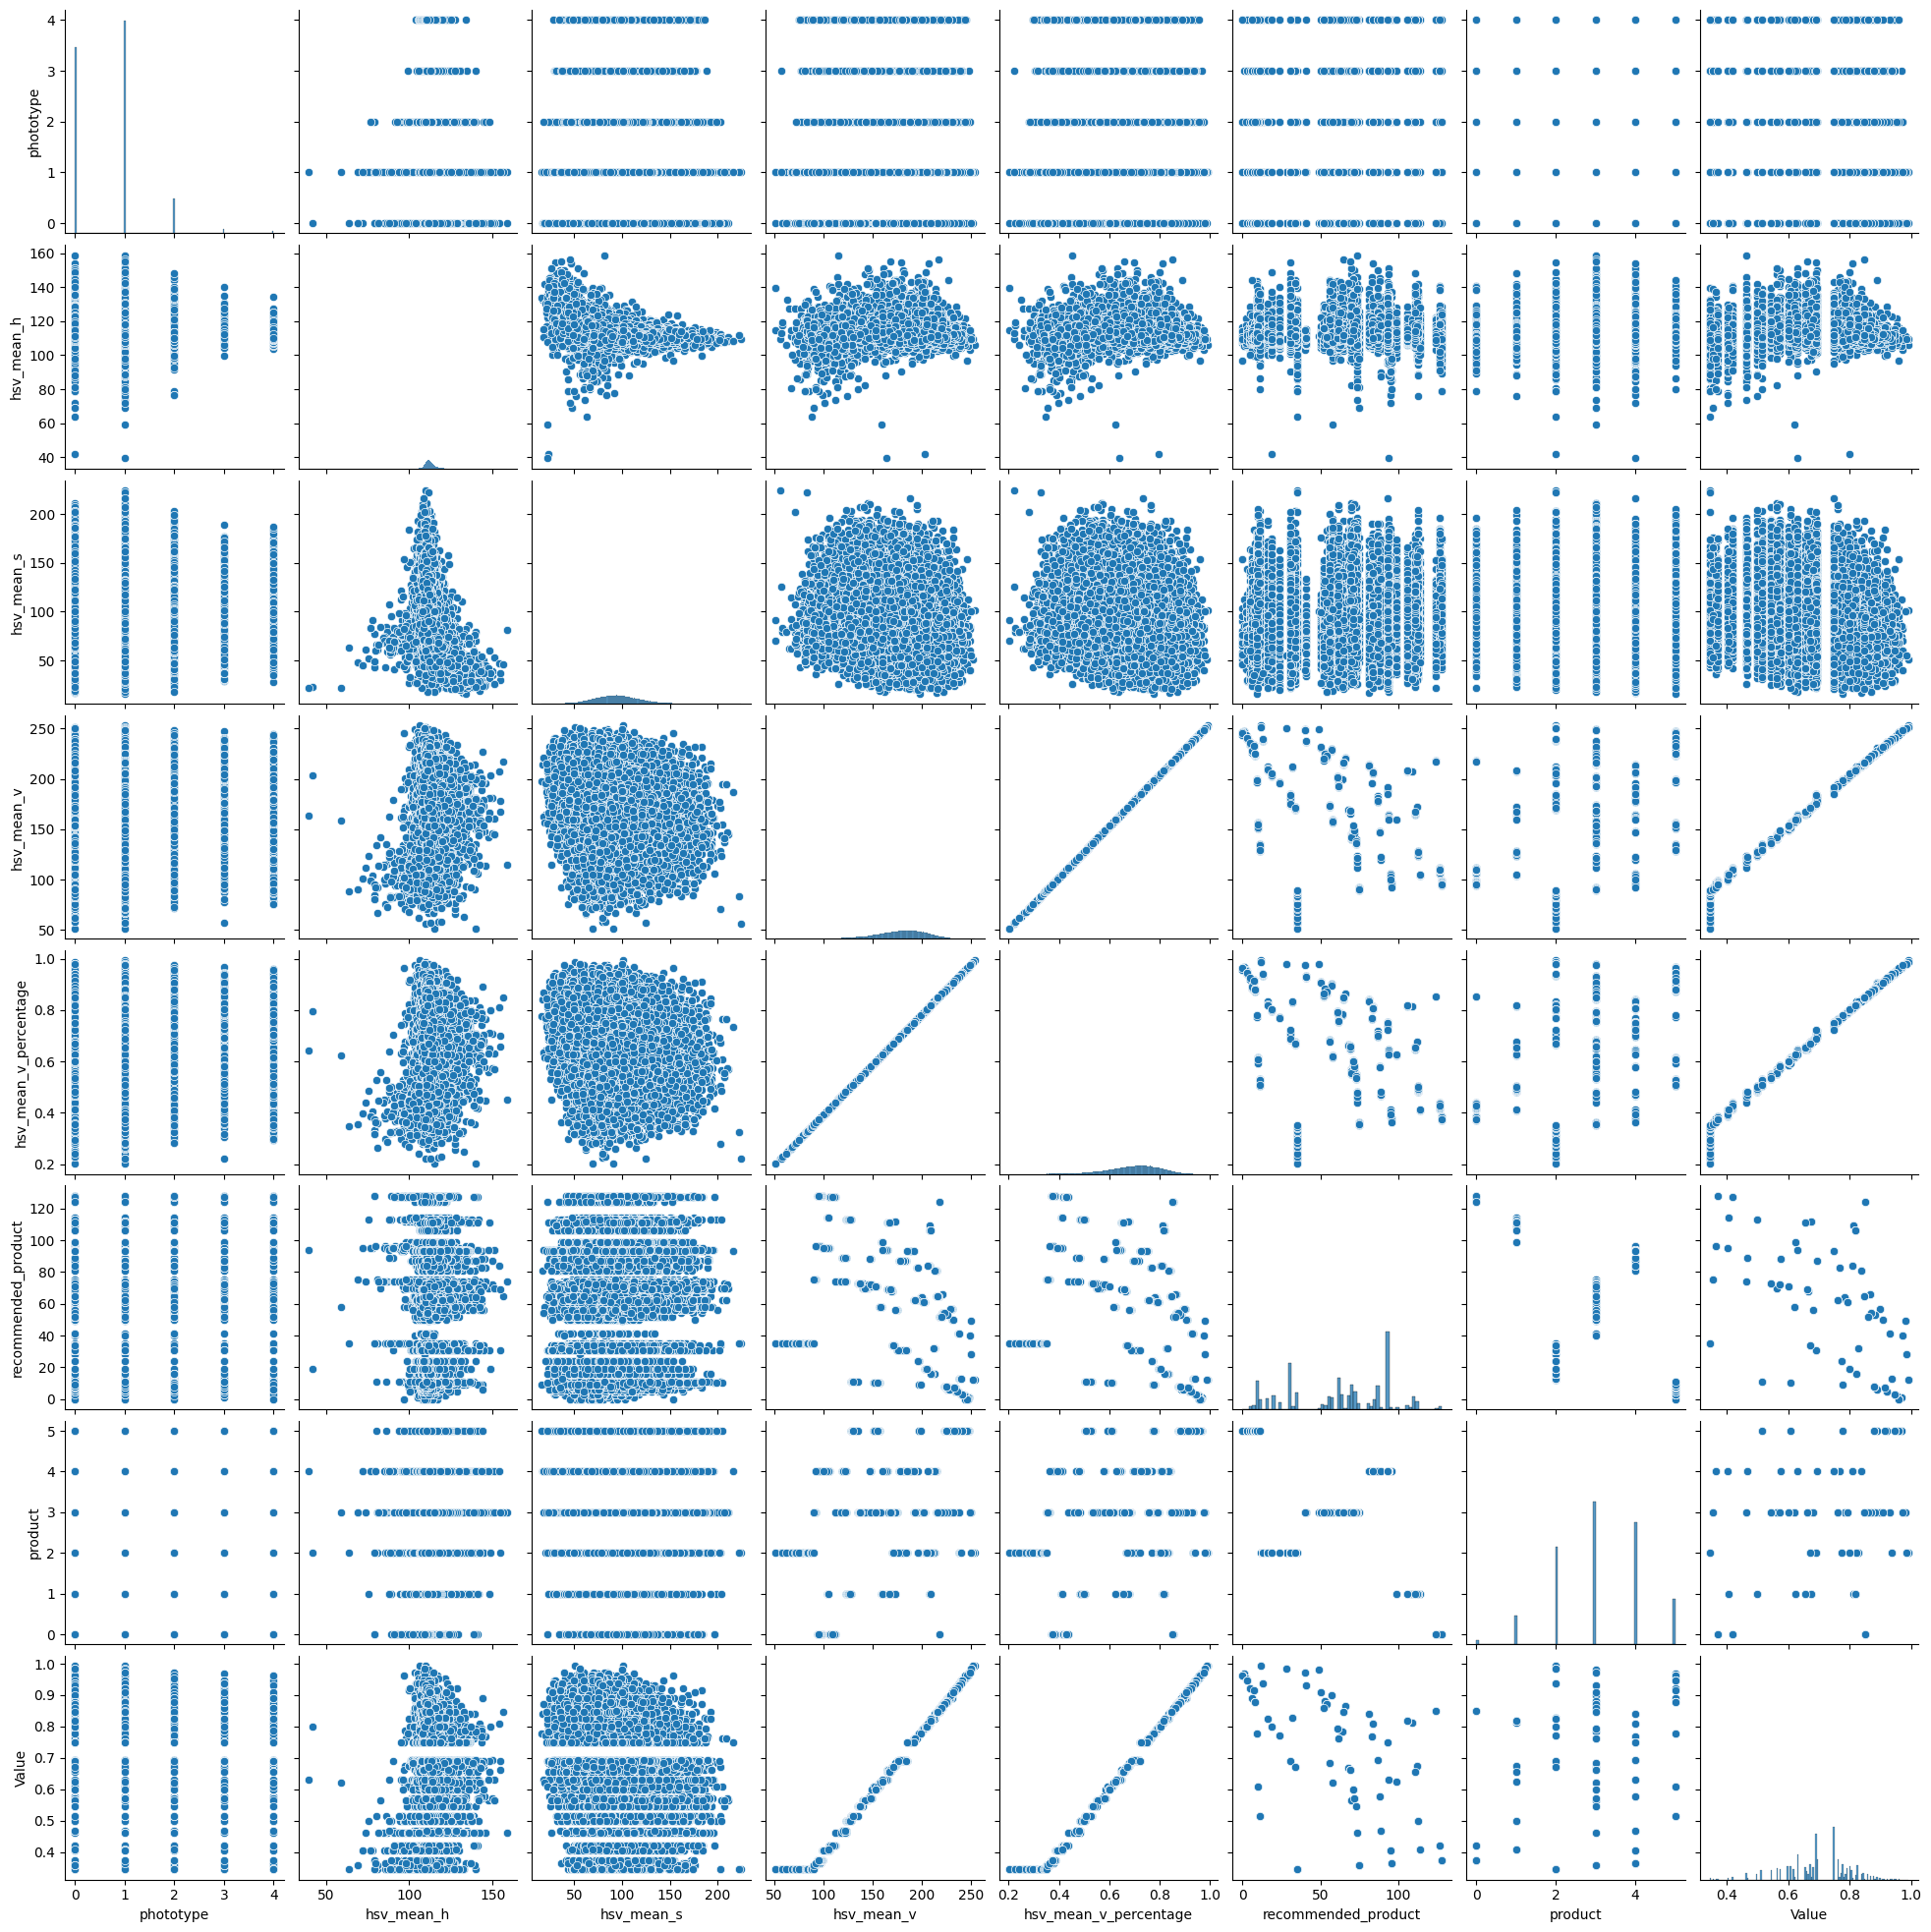

In [176]:
pair_img = sns.pairplot(df_image_new)

## K-Nearest Neighbors

### Imbalance Data

In [178]:
df_image_new.columns

Index(['file', 'phototype', 'hsv_mean_h', 'hsv_mean_s', 'hsv_mean_v',
       'hsv_mean_v_percentage', 'recommended_product', 'product', 'Value'],
      dtype='object')

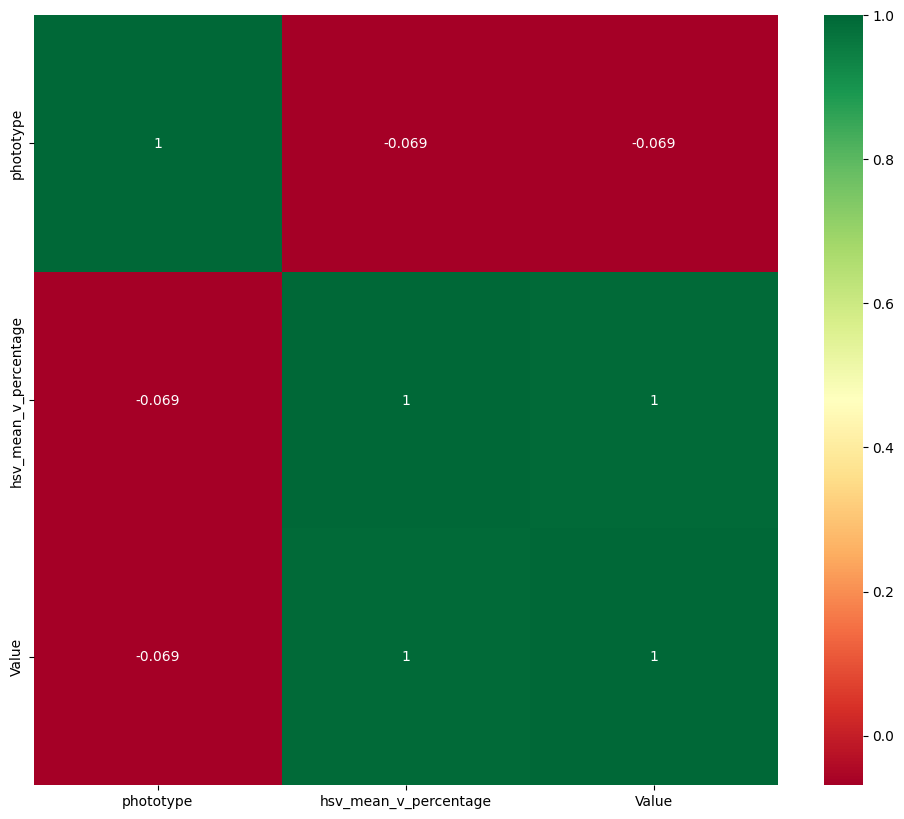

In [218]:
features = [
    "phototype",
    "hsv_mean_v_percentage",
    "Value",
]
selected = df_image_new[features]
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(selected.corr(), annot=True, cmap="RdYlGn")

In [219]:
sc = StandardScaler()
sc.fit(selected)
X = pd.DataFrame(sc.transform(selected), columns=features)
X

,phototype,hsv_mean_v_percentage,Value
0,-0.983648,0.860246,0.879092
1,0.430231,-0.291576,-0.260955
2,0.430231,-0.046968,-0.070947
3,-0.983648,0.556201,0.613081
4,-0.983648,1.246533,1.221106
...,...,...,...
197168,0.430231,-0.087689,-0.070947
197169,0.430231,1.033918,0.993096
197170,-0.983648,1.155535,1.183104
197171,-0.983648,-0.261077,-0.260955


In [220]:
y = df_image_new["product"]

In [221]:
y

0         3
1         2
2         2
3         3
4         2
         ..
197168    2
197169    2
197170    1
197171    2
197172    4
Name: product, Length: 197173, dtype: int64

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [223]:
train_scores = np.array([])
test_scores = np.array([])

for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores = np.append(train_scores, knn.score(X_train, y_train))
    test_scores = np.append(test_scores, knn.score(X_test, y_test))

In [224]:
max_train_score = np.max(train_scores)
train_scores_ind = np.where(train_scores == max_train_score)[0][0]
print(f"Max train score {max_train_score*100:.2f}% at k = {train_scores_ind+1}")

Max train score 100.00% at k = 1


In [225]:
max_test_score = np.max(test_scores)
test_scores_ind = np.where(test_scores == max_test_score)[0][0]
print(f"Max test score {max_test_score*100:.2f}% at k = {test_scores_ind+1}")

Max test score 99.98% at k = 1


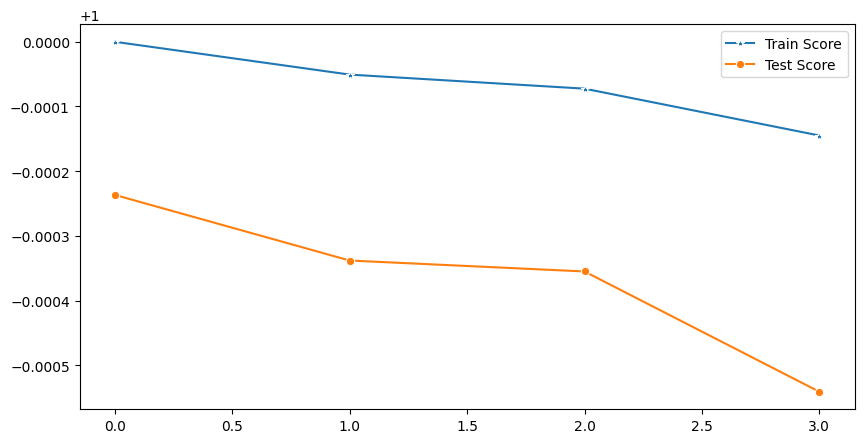

In [226]:
plt.figure(figsize=(10, 5))
line = sns.lineplot(train_scores, marker="*", label="Train Score")
line = sns.lineplot(test_scores, marker="o", label="Test Score")

In [227]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9997633216121179

In [241]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       625
           1       1.00      1.00      1.00      3860
           2       1.00      1.00      1.00     13097
           3       1.00      1.00      1.00     19208
           4       1.00      1.00      1.00     16323
           5       1.00      1.00      1.00      6039

    accuracy                           1.00     59152
   macro avg       1.00      1.00      1.00     59152
weighted avg       1.00      1.00      1.00     59152



In [229]:
knn_cv = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)

[0.99934069 0.99987321 0.99984785 0.99994928 0.99992392]


In [237]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted,0,1,2,3,4,5,All
True,,,,,,,
0,625,0,0,0,0,0,625
1,0,3859,1,0,0,0,3860
2,0,0,13095,2,0,0,13097
3,0,0,1,19207,0,0,19208
4,4,0,0,1,16318,0,16323
5,0,0,2,3,0,6034,6039
All,629,3859,13099,19213,16318,6034,59152
